In [1]:
import sys
sys.path.append("..")
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
%matplotlib ipympl
# %matplotlib inline
from cavsim2d.cavity import Cavity, Cavities, OperationPoints
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
from cavsim2d.cavity import *
# create cavities
cavs = Cavities()
# must first save cavities
cavs.save('D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

# define geometry parameters
midcell = np.array([42, 42, 12, 19, 35, 57.7, 103.353])
endcell_l = np.array([40.34, 40.34, 10, 13.5, 39, 55.716, 103.353])
endcell_r = np.array([42, 42, 9, 12, 39, 56.815, 103.353])
# create cavity
cav1 = Cavity(2, midcell, endcell_l, endcell_r, beampipe='both')
cavs.add_cavity([cav1], ['TESLA'])

eigenmode_config = {
    'processes': 1,
    'rerun': True,
    'boundary_conditions': 'mm',
    'mesh_config': {
        'p': 3,
    }
    }
# run eigenmode analysis
cavs.run_eigenmode(eigenmode_config)  #modify to delete UQ results if rerun=True is selected

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.


In [3]:
cavs[0].plot_mesh()

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

<Axes: xlabel='$z$ [mm]', ylabel='$r$ [mm]'>

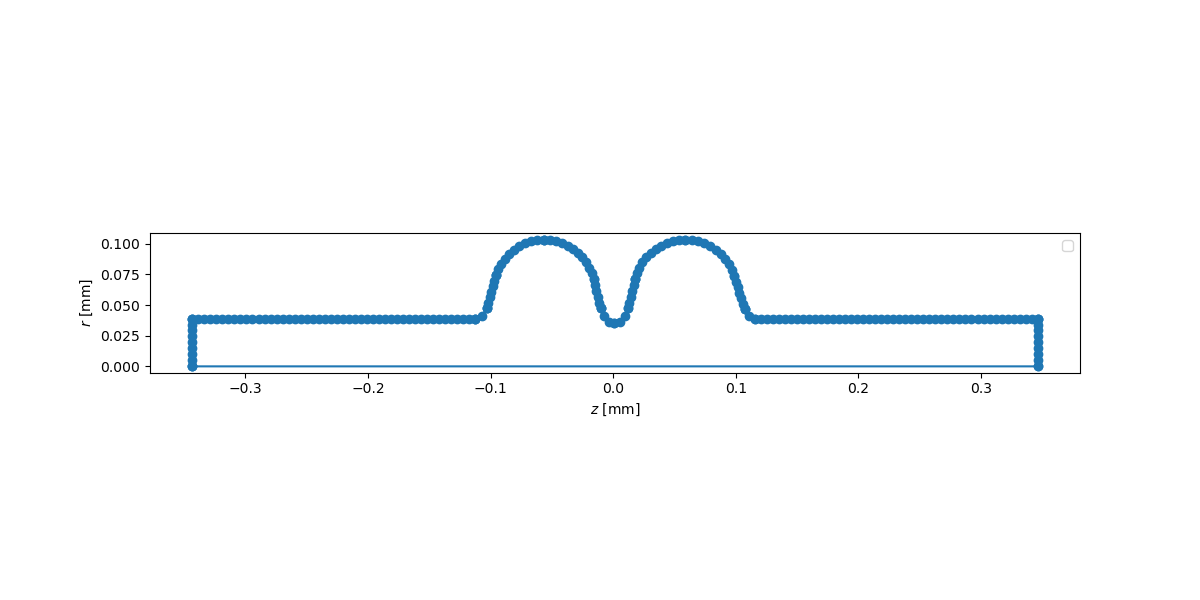

In [4]:
cavs.plot('geometry', marker='o')

In [5]:
cavs[0].plot_fields(mode=2, which='H')

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'Objects': {'Wireframe': Fals…

In [ ]:
cavs[0].study_mesh_convergence()

In [ ]:
cavs[0].convergence_df_data

In [ ]:
cavs[0].convergence_df

In [ ]:
cavs[0].convergence_df.groupby('p').plot('h', ['rel_error_R/Q [Ohm]', 'rel_error_Bpk/Eacc [mT/MV/m]'], logy=True, legend=True)

In [ ]:
# Assuming 'df' is your dataframe
fig, ax = plt.subplots()

# Iterate over the groups and plot them on the same axes
for name, group in cavs[0].convergence_df.groupby('p'):
    group.plot(x='h', 
               y='rel_error_freq [MHz]', 
               logy=True, 
               ax=ax,  # Plot on the same axes
               label=name)  # Use the group name in the label

# Add legend, labels, and title
plt.legend()
plt.title('Grouped Plot by Column "p"')
plt.show()

In [ ]:
cavs[0].plot_mesh()